# Линейная алгебра. Лабораторная работа 1, осень 2021


В этой лабораторной работе вы познакомитесь со средой Jupyter Notebook и библиотеками numpy и scipy.

## Часть 1. Библиотеки

В этой лабораторной работе вам понадобятся три библиотеки:

- `numpy` - основная библиотека для работы с матрицами;
- `scipy`, а точнее модуль `scipy.linalg`, содержащий множество функций линейной алгебры;
- `matplotlib` - графическая библиотека

Подключить их можно следующим образом:

In [9]:
    !pip3 install scipy
    !pip3 install matplotlib

     |████████████████████████████████| 11.3 MB 21.6 MB/s eta 0:00:01    |██████████████████████████▋     | 9.3 MB 21.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 48.6 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 31.3 MB/s eta 0:00:01
     |████████████████████████████████| 880 kB 64.8 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [10]:
# Запустите этот код
import numpy as np

import scipy.linalg as sla

import matplotlib.pyplot as plt
%matplotlib inline

Теперь вы можете позвать, скажем, функцию `scipy.linalg.det()` с помощью кода `sla.det()`, а функцию `numpy.exp()` - с помощью кода `np.exp()`.

**Основные объекты и операции линейной алгебры в NumPy и SciPy:**

Основной объект, с которым вам придётся работать и в этой, и в следующих лабораторных - это, безусловно, матрицы. В библиотеке `numpy` они представлены классом `numpy.ndarray`. Матрицу можно создать из двумерного (а на самом деле и не только двумерного) массива следующим образом:

In [11]:
# Запустите этот код
A = np.array([[1, 2, 3], [4, 5, 6]])

print(A)
print(A.shape) # пара (число строк, число столбцов)

[[1 2 3]
 [4 5 6]]
(2, 3)


Обратите внимание, что матрица заполняется *по строкам*.

Есть и много других конструкторов матриц. Например, единичная матрица размера $n\times n$ создаётся с помощью функции `numpy.eye(n)`. Со всем многообразием конструкторов можно ознакомиться [на этой странице](https://docs.scipy.org/doc/numpy-1.10.1/reference/routines.array-creation.html).

Зачастую бывает нужно получить доступ к подматрицам данной матрицы, и numpy предоставляет множество удобных средств, как это сделать (вообще данная процедура называется slicing):
- элемент с номером `(i,j)`: `A[i,j]`
- i-я строка матрицы: `A[i,:]`
- j-й столбец матрицы: `A[:,j]`

**Внимание!** Оба варианта, и `A[i,:]`, и `A[:,j]` дают не строку или столбец, а одномерный вектор. Если вы хотите получить вектор-строку или вектор-столбец соответственно, используйте вот такой синтаксис: `A[i:i+1,:]`, и `A[:,j:j+1]`
- строки с нулевой по i-ю: `A[:i+1,:]`
- столбцы с j-го по последний: `A[:,j:]`
- строки с i-й по k-ю: `A[i:k,:]`

В некоторых случаях нужно получить доступ к (прямоугольной) подматрице, элементы которой находятся на пересечении строк из списка `rows` и столбцов из списка `columns`. В этом случае `A[rows, columns]` даст не то, что вы ожидаете (можете попробовать это сделать сами и увидеть, что получится; только возьмите `rows` и `columns` одного размера). Справиться с этой задачей позволяет код `A[np.ix_(rows, columns)]`

*Умножение матриц* производится с помощью функции `np.dot()` либо оператора `@`. Есть три варианта написания: `A.dot(B)` и `np.dot(A, B)`, `A @ B`.

Обычные знаки арифметических действий (`+`, `-`, `*`) зарезервированы для поэлементных операций. Например, `A * B` - это матрица, элементами которой являются произведения $A_{ij}B_{ij}$. Помимо этих есть и множество других поэлементных операций. Например, `numpy.exp(A)` - это матрица, элементами которой являются экспоненты элементов матрицы `A`.

Чтобы получить матрицу, *транспонированную* к матрице `A`, напишите просто `A.T`. 

В некоторых случаях бывает нужно создавать *случайные матрицы*: например, при проведении экспериментов или для инициализации итеративных методов. Средства для этого предоставляет пакет [numpy.random](https://docs.scipy.org/doc/numpy/reference/routines.random.html). Так, `np.random.rand(m,n)` - это матрица $m\times n$, элементы которой независимо выбраны из равномерного распределения на интервале `[0;1)` 

Для *решения систем линейных уравнений* в пакете `scipy.linalg` есть множество методов, рассмотрение которых выходит за пределы курса линейной алгебры. Мы вам пока предлагаем пользоваться функцией `scipy.linalg.solve`, основанной на методе Гаусса. Отметим, что `scipy.linalg.solve(A, B)` выдаёт решение уравнения $AX = B$ (или ошибку), где $B$ может быть как вектором, так и матрицей.

Найти обратную матрицу для матрицы $A$ можно с помощью функции `sla.inv(A)`.

**Копирование сложных объектов в Python**

Когда вы делаете присваивание каких-то сложных объектов, как правило оно происходит по ссылке. Например, код
```
B = A
B[0,0] = 10
```
приведёт к изменению матрицы `A`.

Не попадайтесь в эту ловушку! Если вы хотите работать с копией как с независимой матрицей, используйте метод `copy()`:
```
B = A.copy()
```

**Где искать помощь**

Библиотеки `numpy` и `scipy` снабжены прекрасной документацией. Если у вас возникают вопросы о том, как работает та или иная функция (или даже как называется функция, выполняющая то, что вам нужно), вы почти всегда можете найти там ответы.

[Ссылка на документацию пакета scipy.linalg](https://docs.scipy.org/doc/scipy-0.18.1/reference/linalg.html)

Если у вас возникает какая-то ошибка и вы не можете понять, что вы делаете не так, то

1.   В первую очередь попробуйте просто загуглить текст ошибки, наверняка в интернете кто-то уже сталкивался с такой ситуацией;
2.   Поспрашивайте своих одногруппников, не было ли у них такой ошибки, и если была -- как они справлялись;
3.   Попросите помощи у вашего учебного ассистента.

Важно искать помощь именно в таком порядке! Если ни один из шагов выше не помог или вы столкнулись с ситуацией, в которой вам заведомо не поможет ни один из пунктов выше (например, в задании вас просят доказать заведомо ложное утверждение), тогда можете написать сюда: st-fedotov@yandex-team.ru (Станислав Федотов, выступал перед выдачей лабораторной), или сюда: [@johanDDC](https://t.me/johanDDC) (Ваня Пешехонов, ассистент курса).



**И всё-таки задание**

**Задание 1.1 [0.2 за каждый пункт]** В качестве первого задания мы попросим вас отыскать соответствующие функции в библиотеке и сделать следующее:

- создайте нулевую матрицу $Z$ размера $3\times4$;

- создайте диагональную матрицу $5\times5$ с диагональными элементами 1, 2, 3, 4 и 5;

- найдите её след (не силою мысли, а с помощью библиотечных функций, конечно);

- найдите обратную к ней матрицу;

- сгенерируйте случайную матрицу $X$ размера $4\times5$;

- найдите определитель подматрицы матрицы $X$, расположенной на пересечении 2-й и 3-й строк и 1-го и 2-го столбцов; считаем, что строки и столбцы нумеруются с единицы (используйте slicing!). Такой определитель называется **минором** матрицы $X$;

- найдите произведение $X^TX$.

Пожалуйста, каждый пункт делайте в новом блоке и не забывайте распечатывать результаты.

In [12]:
np.zeros((3, 4), dtype=int) #нулевая матрица размера 3х4

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [13]:
A = np.diag(np.arange(1, 6)) #диагональная матрица 5х5 с диагональными элементами 1, 2, 3, 4 и 5
A

array([[1, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 4, 0],
       [0, 0, 0, 0, 5]])

In [14]:
np.trace(A)

15

In [15]:
sla.inv(A)

array([[ 1.        ,  0.        , -0.        ,  0.        , -0.        ],
       [ 0.        ,  0.5       , -0.        ,  0.        , -0.        ],
       [ 0.        ,  0.        ,  0.33333333,  0.        , -0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.25      , -0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.2       ]])

In [16]:
X = np.random.rand(4, 5) #случайная матрица размера 4х5
X

array([[0.58626077, 0.32190747, 0.95102326, 0.91737128, 0.31217645],
       [0.4908365 , 0.07140988, 0.1809828 , 0.44148283, 0.30212372],
       [0.39085307, 0.26155127, 0.57931213, 0.35880133, 0.46314792],
       [0.41809929, 0.54871034, 0.75518363, 0.55608047, 0.98666829]])

In [17]:
Z = X[np.ix_([1, 2], [0, 1])]
print(Z)
np.linalg.det(Z)

[[0.4908365  0.07140988]
 [0.39085307 0.26155127]]


0.10046814048488095

In [18]:
Y = X.transpose()
np.dot(Y, X)

array([[0.91219529, 0.55541582, 1.18854825, 1.12725013, 0.92485825],
       [0.55541582, 0.4782159 , 0.88496234, 0.72580695, 0.78459857],
       [1.18854825, 0.88496234, 1.84310487, 1.58014306, 1.36498921],
       [1.12725013, 0.72580695, 1.58014306, 1.47444104, 1.1346092 ],
       [0.92485825, 0.78459857, 1.36498921, 1.1346092 , 1.37675318]])

## Часть 2. Время

Питон мотивирует пользоваться библиотечными функциями, когда они доступны, а не писать собственные. Библиотечные функции основаны на современных алгоритмах, обычно пишутся на более эффективных языках, таких как C++ или Fortran, а кроме того, оптимизированы для работы на многопроцессорных устройствах, так что обогнать эти решения просто так вы не сможете.

**Задание 2.1 [0.75 баллов]**
Мы предлагаем вам убедиться в этом самим. Напишите функцию `my_det`, которая вычисляла бы определитель матрицы с помощью элементарных преобразований над строками. Функция должна выкидывать `ValueError` в случаях, если матрица не является квадратной.

In [21]:
def my_det(X):
    n = len(X)
    m = len(X[0])
    if n != m:
        raise ValueError
    else:
        det = 1
        for i in range(n):
            cnt = 0
            for j in range(i, n):
                if X[i][j] != 0:
                    X[i,:], X[j,:] = X[j,:], np.copy(X[i,:])
                    if i != j:
                        det *= -1
                    cnt += 1
                    break
            if cnt == 0:
                return 0
            for m in range(i + 1, n):
                X[m] = X[m] -  X[i] * (X[m][i] / X[i][i])
        for i in range(n):
            det *= X[i][i]       
    return det

In [22]:
X = np.array([[1,0,1], [0,1,0], [0,0,10]])
my_det(X)

10

Простая проверка:

In [23]:
# Запустите этот блок кода
X = np.array([[0,0,1], [0,1,0], [1,0,0]])
print(np.linalg.det(X))

-1.0


На случай, если нам просто повезло с этой матрицей, имеет смысл написать чуть более хитрые тесты. Мы сгенерируем несколько случайных матриц $8\times8$ с помощью функции `numpy.random.rand` и сравним ответ, выдаваемый нашей функцией, с настоящим определителем (результатом работы библиотечной функции `scipy.linalg.det`):

In [25]:
# Запустите этот блок кода
for _ in range(10):
    X = np.random.rand(50, 50)
    if np.abs(my_det(X) - sla.det(X)) > 1e-6:
        print('FAILED')

Если вы ни разу не получили `FAILED`, то ваша функция работает правильно.

Теперь давайте сравним скорость работы вашей функции и библиотечной функции `scipy.linalg.det`. В Питоне есть несколько способов измерения времени; мы воспользуемся декоратором `%timeit`. Будучи написан перед функцией, он запускает её некоторое количество раз, выбирает три случайных запуска и возвращает длительность самого быстрого из них. Модификатор `-o` между декоратором и функцией позволяет сохранять результаты работы декоратора в переменную.

Приготовьтесь, что следующий блок может работать сравнительно долго.

9.28 µs ± 157 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
158 µs ± 790 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
189 µs ± 7.86 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
15 ms ± 46.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
18.2 ms ± 311 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


/var/folders/s5/j9kz0s4n6n582srv8ktdfnp80000gn/T/ipykernel_8461/10283287.py:30: RuntimeWarning: overflow encountered in double_scalars
  det *= X[i][i]


1.89 s ± 48.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


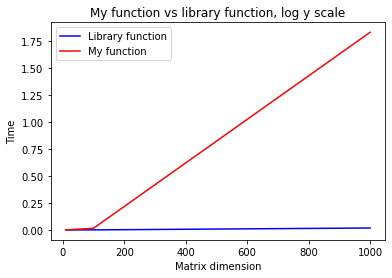

In [77]:
# Запустите этот блок кода
lib_times = []
my_times = []
dimensions = [10, 100, 1000]
for dim in dimensions:
    A = np.random.rand(dim, dim)
    res_lib = %timeit -o sla.det(A)
    lib_times.append(res_lib.best)
    res_my = %timeit -o my_det(A)
    my_times.append(res_my.best)    

plt.plot(dimensions, lib_times, color='blue', label='Library function')
plt.plot(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

У вас должны были получиться графики, показывающие, как растёт с ростом размерности матрицы время вычисления определителя. Поскольку они вышли не больно-то красивыми, мы нарисуем их в *логарифмическом масштабе* по оси у:

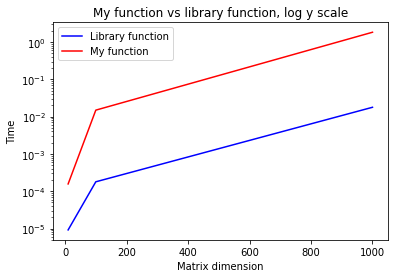

In [78]:
# Запустите этот блок кода
plt.semilogy(dimensions, lib_times, color='blue', label='Library function')
plt.semilogy(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

Вы можете убедиться, что библиотечная функция работает *гораздо* быстрее.

## Часть 3. Точность

Наверняка вы уже что-то знаете про floating point arithmetics и связанные с этим трудности и понимаете, что на компьютере вычисления с вещественными числами производятся лишь с ограниченной точностью. 

**Задание 3.1 [0.5 балла]** В качестве первого примера, показывающего различие между длинной арифметикой целых чисел и floating point arithmetics, предлагаем вам перемножить две пары матриц:

$$
\begin{pmatrix}
1 & 0\\
10^{20} & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
10^{-20} & 1\\
0 & 1 - 10^{20}
\end{pmatrix}
$$
и
$$
\begin{pmatrix}
1. & 0.\\
10.^{20} & 1.
\end{pmatrix}
\cdot
\begin{pmatrix}
10.^{-20} & 1.\\
0. & 1. - 10.^{20}
\end{pmatrix}
$$
Во втором случае мы специально указали Питону (поставив везде десятичные точки), что хотим работать не с целыми числами, а с числами с плавающей точкой. Посмотрим, получатся ли одинаковые ответы:

In [54]:
A = np.matrix([[1, 0], [10 ** 20, 1]])
B = np.matrix([[10 ** (-20), 1], [0, 1 - 10 ** 20]])
np.dot(A, B)


matrix([[1e-20, 1],
        [1.0, 1]], dtype=object)

In [29]:
A = np.matrix([[1., 0.], [10. ** 20, 1.]])
B = np.matrix([[10. ** (-20), 1.], [0., 1. - 10. ** 20]])
np.dot(A, B)

matrix([[1.e-20, 1.e+00],
        [1.e+00, 0.e+00]])

Вывод: правильный был ответ в первом случае, стало ясно, что погрешность в случае испольщования float достаточно велика

И какой из них правильный?

---
**Напишите здесь свой ответ**

**Задание 3.2 [0.75 балла]** Впрочем, и с целыми числами тоже не всегда всё хорошо. Напишите функцию, генерирующую *матрицу Паскаля* заданной размерности $n$, то есть матрицу $P$, в которой $P_{ij} = C_{i+j}^i$. В этом задании нельзя пользоваться библиотечной функцией `scipy.linalg.pascal` или её аналогами из других библиотек. Обратите внимание, что использование факториалов крайне нежелательно, так как быстро приведёт к переполнению.

В этом задании вы можете использовать цикл ``for``.

In [26]:
def my_pascal(dim):
    '''
    Мы создали для вас матрицу из нулей размера dim x dim,
    но вы можете ей не пользоваться, если не хотите
    '''
    P = [[1] * dim for _ in range(dim)]
    for i in range(1, dim):
        for j in range(1, dim):
            P[i][j] = P[i-1][j] + P[i][j-1]
    return P

In [27]:
np.matrix(my_pascal(7))

matrix([[  1,   1,   1,   1,   1,   1,   1],
        [  1,   2,   3,   4,   5,   6,   7],
        [  1,   3,   6,  10,  15,  21,  28],
        [  1,   4,  10,  20,  35,  56,  84],
        [  1,   5,  15,  35,  70, 126, 210],
        [  1,   6,  21,  56, 126, 252, 462],
        [  1,   7,  28,  84, 210, 462, 924]])

Определитель такой матрицы равен 1. Поскольку такую матрицу можно получить перемножением нижнетреугольной и верхнетреугольной матриц паскаля. У таких матриц на диагонале стоят единицы, поэтому их определитель будет равен единицы. Следовательно, при умножении 1 на 1 мы получим, что определитель нашей матрицы также равен 1.

Такого же результата можно добиться с помощью преобразований над строками. Так, будем вычитать из строчки предыдущую, начиная с конца (из последней вычтем предпоследнюю, из предпоследний третью с конца ..... из второй первую). Затем повторим эту же операцию, но последним действием вычтем из третьей строки вторую. Если проделать эти преобразования n-1 раз, получится верхнетреугольная матрица, с единицами на диагонали. Определитель такой матрицы равен произведению элементов на главной диагонали, то есть единице

Чему равен её определитель? Строго поясните свой ответ.

----
**Ваше решение**

А теперь вычислите определитель матрицы Паскаля $30\times30$ с помощью библиотечной функции `scipy.linalg.det`:

In [81]:
X = np.array(my_pascal(30), dtype=int)
sla.det(X)

-4.361831882184299e+51

Разница заметна невооружённым взглядом!

Как вы помните из лекций, квадратная матрица называется вырожденной, если её определитель равен нулю. На практике часто приходится иметь дело с матрицами, "близкими" к вырожденным. Вырожденные и близкие к вырожденным матрицы обладают мерзким свойством численной неустойчивости. Что такое численная неустойчивость? Скажем, пусть мы решаем систему $Ax = b$, и пусть $\dot x$ -- её частное решение. Теперь предположим, что правая часть системы немного испортилась (например, если правая часть -- это выход какого-то алгоритма, то тогда она может испортиться из-за неточных вычислений в этом алгоритме), и теперь мы решаем систему $Ax = b + \Delta b$. Если элементы вектора $\Delta b$ невелики по модулю, нам бы очень хотелось, чтобы и решение новой системы не сильно отличалось от решения исходной системы. Именно это мы и будем называть численной устойчивостью.

**Задание 3.3 [0.15 балла]** Дана система
$$
\begin{cases}
x_1 + 1000x_2 = 2004\\
100x_1 + 100001x_2 = 200402
\end{cases}
$$
Найдите решение этой системы (можно устно). Найдите определитель её матрицы коэффициентов.

x1 = 4 , x2 = 2

In [15]:
C = np.matrix([[1, 1000], [100, 100001]], dtype=int)
sla.det(C)

1.0000000000047748

Теперь немного испортим правую часть этой системы, пусть теперь она имеет вид
$$
\begin{cases}
x_1 + 1000x_2 = 2004.01\\
100x_1 + 100001x_2 = 200402
\end{cases}
$$

Найдите решение системы с испорченной правой частью. Сравните решения исходной и новой систем. Что вы можете сказать?

In [16]:
A = np.matrix([[1, 1000], [100, 100001]])
B = np.array([[2004.01], [200402]])
sla.solve(A, B)

array([[1.00401e+03],
       [1.00000e+00]])

Что- то надо написать 

Оказывается, что значение определителя довольно плохо измеряет степень отклонения данной матрицы от вырожденной. Хорошей метрикой в этом плане является число обусловленности матрицы.

**Определение**. Пусть $A$ -- квадратная матрица порядка $n$. Числом обусловленности матрицы $A$ назовём число $\mathrm{cond}(A)$, определяемое по формуле
$$
\mathrm{cond}(A) = \sqrt{\mathrm{tr}(A^TA)\mathrm{tr}((A^{-1})^TA^{-1})}
$$
Если матрица вырожденна, то $\mathrm{cond}(A)$ положим равным бесконечности.

Как можно догадаться из определения, матрица тем ближе к вырожденной, чем больше её число обусловленности, ведь у вырожденной матрицы это число равно бесконечности!

**Задание 3.4 [0.2 баллов]** Напишите функцию, которая для заданной матрицы $A$ возвращает её число обусловленности. Функция должна выкидывать `ValueError` в случаях, если матрица не является квадратной.

In [56]:
def my_cond(A):
    '''
    Parameters
    ----------
    A : array_like
    
    Returns
    -------
    cond : float
          Condition number of A.
    '''
    if A.shape[0] != A.shape[1]:
        raise ValueError
    else:
        A_transposed = np.transpose(A)
        A_inverse = np.linalg.inv(A)
        A_inverse_tr = np.transpose(np.linalg.inv(A))
        cond = (np.trace(A_transposed @ A) * np.trace(A_inverse_tr @ A_inverse)) ** 0.5
    
    
    return cond

Посчитайте число обусловленности матрицы из задания 3.3.

In [61]:
A = np.array([[1, 1000], [100, 100001]])
my_cond(A)

10001210002.009096

Постройте график зависимости числа обусловленности матрицы Паскаля от размера $n \in [5, 30]$.

No handles with labels found to put in legend.


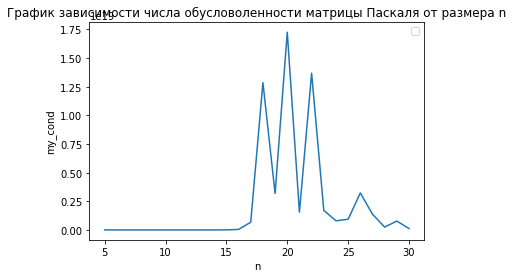

In [102]:
import matplotlib.pyplot as plt
ox = range(5, 31)
plt.plot(ox, list(map(lambda n: my_cond(sla.pascal(n)), ox)))
# plt.semilogy(dimensions, lib_times, color='blue', label='Library cond')
# plt.semilogy(dimensions, my_times, color='red', label='My cond')
plt.title('График зависимости числа обусловоленности матрицы Паскаля от размера n')
plt.xlabel('n')
plt.ylabel('my_cond')
plt.legend()

# Запустите этот блок кода
# plt.semilogy(dimensions, lib_times, color='blue', label='Library function')
# plt.semilogy(dimensions, my_times, color='red', label='My function')
# plt.title('My function vs library function, log y scale')
# plt.ylabel('Time')
# plt.xlabel('Matrix dimension')
# plt.legend()

Как видите, посчитанные выше числа обусловленности весьма велики, что вполне согласуется с численными эффектами, которые вы наблюдали ранее при работе с соответствующими матрицами.

## Часть 4. Матричные вычисления

Вы уже видели, что использования циклов (и самописных вычислений в целом) в Питоне лучше по возможности избегать, и важно уметь находить способы делать всё библиотечными средствами.

В качестве примера рассмотрим две задачи:

**1.** Предположим, нужно вычислить суммы элементов в каждой строке матрицы `A`. Ясно, что можно написать простую функцию с двумя циклами, которая это посчитает, но так лучше не делать. Правильный способ такой:
```
A.sum(axis=1)
```
Параметр `axis=1` означает, что суммы берутся по строкам. Если вы хотите просуммировать по столбцам, укажите `axis=0`. Если вообще пропустить параметр `axis` (вызвать `A.sum()`), то функция вернёт сумму *всех* элементов матрицы.

**2.** Теперь допустим, что нам нужно каждый столбец матрицы `A` умножить на некоторое число. Более точно, пусть у нас есть (одномерный) вектор `w = np.array([w_1,...,w_n])`, и мы должны `i`-й столбец `A` умножить на число `w_i`. Опять же, это можно сделать в пару циклов, но лучше использовать операцию поэлементного умножения:
```
A * w.reshape((1,n))
```
Оператор `reshape` нужен для того, чтобы из одномерного вектора сделать вектор-строку.

Аналогично если на числа `w_1,...,w_n` умножаются *строки* матрицы, нужно превратить `w` в вектор-столбец:
```
A * w.reshape((n,1))
```

Дальше вам будет предложено попрактиковаться в матричных вычислениях. В следующих трёх заданиях нельзя пользоваться циклами, а также конструкциями `map` и `reduce` и им подобными; вместо этого постарайтесь свести всё к матричным операциям из `numpy` (но, опять же, не `np.vectorize` или чему-то подобному). Чтобы убедиться, что получилось именно то, что нужно, пишите собственные тесты со случайными матрицами.

**Задание 4.1 [0.75 балла]** Напишите функцию `prod_and_sq_sum(A)`, вычисляющую произведение диагональных элементов, и сумму квадратов диагональных элементов квадратной матрицы `A`.

In [82]:
def prod_sq_sum(A):
    diag = A.diagonal()
    prod_diag = diag.prod()
    square_diag = np.power(diag, 2)
    square_sum = np.sum(square_diag)
    return prod_diag, square_sum

In [83]:
A = np.random.rand(2, 2)
print(A)
prod_sq_sum(A)

[[0.52659105 0.91797213]
 [0.88064095 0.71499649]]


(0.37651074743900853, 0.7885181041315465)

**Задание 4.2 [0.75 балла]** Для матриц `A` и `B` размера $m\times n$ обозначим через $a_1,\ldots,a_n$ и $b_1,\ldots,b_n$ соответственно их столбцы, $\lambda_1, \ldots, \lambda_n$ --- некоторые числа. Напишите функцию `f(A, B, lmbd, k)`, вычисляющую

$$\sum_{i=1}^{\min(k,n)}\lambda_ia_ib_i^T$$

In [7]:
def f(A, B, lmbd, k):
    m = A.shape[1]
    t = min(k, m)
    ai = A[:,:t]
    bi = B[:,:t].T
    ans = lmbd * ai.dot(bi)
    return ans

In [8]:
A = np.array([[1,6,1], [2,1,0]])
B = np.array([[9,0,1], [34,1,10]])
lmbd = 3
k = 2
f(A, B, lmbd, k)

array([[ 27, 120],
       [ 54, 207]])

**Задание 4.3 [0.75 балла]** Напишите функцию `get_diag(A,B)`, принимающую две квадратных матрицы матрицы `A` и `B` одного размера и возвращающую вектор диагональных элементов произведения `AB`, не вычисляя произведение целиком. 

In [89]:
def get_diag(A, B):
    ans = np.sum(A * B.T, axis=1)
    return ans

In [90]:
A = np.array([[1,6,1], [1,1,0], [1, 2, 3]])
B = np.array([[9,0,1], [34,1,10], [1, 0, 0]])
get_diag(A, B)

array([214,   1,  21])

## Часть 5. Комплексные числа и геометрия

У вас уже была возможность убедиться, что многие операции над комплексными числами имеют наглядную геометрическую интерпретацию. В этом задании вам будет предложено этим воспользоваться.

В Python число $i$ (мнимая единица) обозначено через `1j`. Так, число $0,5 + 1,2i$ будет иметь вид `0.5 + 1.2 * 1j`.

При выполнении задания вы должны работать с точками плоскости как с комплексными числами. Любые преобразования должны быть реализованы с помощью операций над комплексными числами: сложения, вычитания, умножения, деления, возведения в степень и комплексного сопряжения.

**Задание 5.1 [0.75 баллов]** Напишите функцию `shrink_rotate`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- действительный коэффициент `coef`,
- угол `alpha`, заданный в радианах

и осуществляет следующее преобразование: мы берём вектор $AX$, умножаем его `coef`, поворачиваем вокруг точки $A$ на угол `alpha` против часовой стрелки, после чего возвращаем конец полученного вектора. Ниже (левая картинка) мы приводим иллюстрацию действия этого преобразования:

<img src="ShrinkRotate.png">

**Задание 5.2 [0.75 баллов]** Напишите функцию `shrink_rotate_conj`, которая сначала делает то же самое, что и `shrink_rotate`, а после этого отражает вектор $AY$ относительно горизонтальной прямой, проходящей через точку $A$, и возвращает точку $Y'$ (см. правую часть рисунка).

**Задание 5.3 [0.75 баллов]** Напишите функцию `geometric_inverse`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- положительное действительное число $r$

и осуществляет инверсию точки $X$ относительно окружности с центром $A$ радиуса $r$. [Определение инверсии вы можете посмотреть здесь](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%8F_(%D0%B3%D0%B5%D0%BE%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D1%8F)).

In [13]:
def shrink_rotate(x, a, coef=1., angle=0.):
    try:
        res = x - a
        ans = res * coef * (np.cos(angle) + 1j * np.sin(angle))
        return a + ans
    except:
        raise NotImplementedError()
    
def shrink_rotate_conj(x, a, coef=1., angle=0.):
    try:
        res = x - a
        ans = res * coef * (np.cos(angle) + 1j * np.sin(angle))
        return a + ans.conj()
    except NotImplementedError():
        raise NotImplementedError()
    
def geometric_inverse(x, a, r):
    try:
        ans = (r**2 / abs(x - a)) * ((x - a) / abs(x - a))
        return a + ans
    except NotImplementedError():
        raise NotImplementedError()

**Задание 5.4 [0.5 баллов]** Рассмотрим следующий процесс:

```
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
```

Запустите его и нарисуйте множество точек, получающихся на итерациях начиняя с десятой.

*Указание*. Представьте квадрат $[-1,1]\times[-1,1]$ матрицей пикселей 1000x1000. Сначала все элементы матрицы положим нулями, а на каждой итерации начиная с десятой будем присваивать единицу соответствующему пикселю этой матрицы. То, что получилось, можно нарисовать с помощью функции `plt.imshow(..., cmap='gray')`. Картинку лучше сделать побольше, предварив `imshow` вызовом `plt.figure(figsize=(20, 20))`.

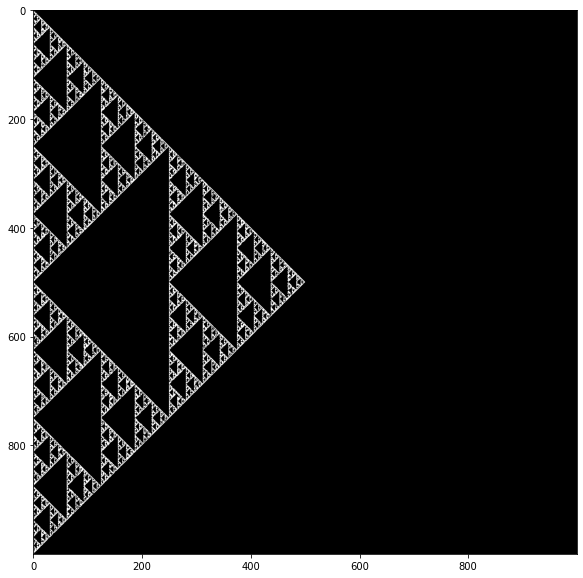

In [20]:
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]
arr = np.zeros((1000,1000))
for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    if n_iter > 9:
        x = int(z.real * 500 + 500)
        y = int(z.imag * 500)
        arr[x][y] = 1
plt.figure(figsize=(10, 10))
plt.imshow(arr, cmap='gray')

**Задание 5.5 [0.75 баллов]** Попробуйте объяснить, почему получается именно эта фигура.

---
Ваше объяснение

**Задание 5.6 [0.5 баллов]** Поэкспериментируйте с другими преобразованиями. Попробуйте найти какой-нибудь другой красиво выглядящий фрактал.

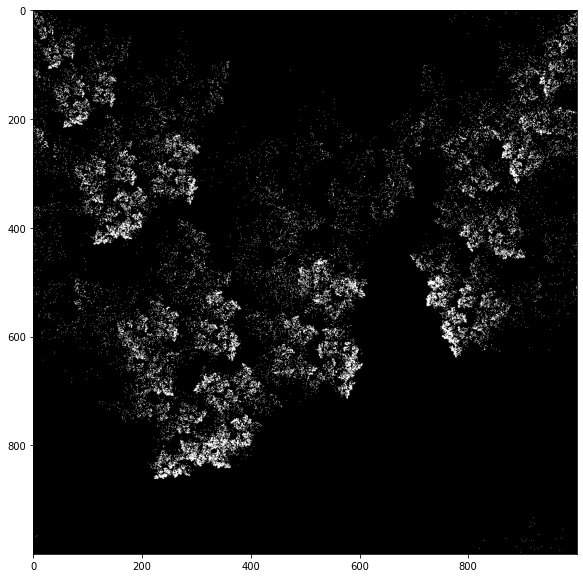

In [35]:
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, -1. + 1.*1j, coef=1, angle=0.)),
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=1.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: geometric_inverse(t, 0. + -1*1j, 1.)),
    (lambda t: geometric_inverse(t, 1. + 1*1j, 1.))
]
arr = np.zeros((1000,1000))
for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    if n_iter > 9:
        x = int(z.real * 500 + 500)
        y = int(z.imag * 500)
        arr[x][y] = 1
plt.figure(figsize=(10, 10))
plt.imshow(arr, cmap='gray')

## Часть 6 (бонус). Метод Гаусса или обратные матрицы?

**Задание 6.1 [1.5 балла]** Пусть нам дано матричное уравнение $Ax = B$, где $A$ --- матрица размера $n\times n$, а $B$ --- матрица размера $n\times m$ (отметим, что это уравнение можно интерпретировать как $m$ систем с векторными правыми частями и однаковыми левыми). Вообще говоря, методов решения таких уравнений очень много, но мы пока рассмотрим два из них, с которыми вы уже хорошо знакомы.
1. Метод Гаусса;
2. Умножение на обратную матрицу: $x = A^{-1}B$.

В этом задании вы попробуете ответить на вопрос о том, какой из этих методов эффективнее. Проведите два эксперимента:
- сравните скорости решения системы при фиксированном `m = 10` и `n`, изменяющемся в пределах от 10 до 1000, например, для `n=10, 50, 100, 200, 500, 1000` (рост числа неизвестных при фиксированном количестве правых частей);
- сравните скорости решения системы при фиксированном `n = 100` и `m`, меняющемся от 10 до 10000, например, для `m = 10, 100, 500, 1000, 2000, 5000, 10000` (рост числа правых частей при фиксированном числе неизвестных).

При проведении экспериментов не возбраняется использовать циклы `for`.

Эксперименты проведите на случайных матрицах, созданных с помощью функции `numpy.random.rand`. Постройте графики времени выполнения функции от размерности (лучше в логарифмическом масштабе). Сделайте выводы (в письменном виде!) о том, какой их методов оказывается лучше в каких обстоятельствах.

Чтобы всё это не казалось вам чёрной магией, найдите число операций (суммарно сложения, умножения и деления), необходимых для решения системы каждым из методов. Обратите внимания на члены суммарной степени 3 (суммарной по $m$ и $n$; члены меньшего порядка можете даже не считать). Постарайтесь объяснить полученные ранее результаты.

In [ ]:
# Your code here